# Overfitting, Underfitting y Regularización
En el presente documento exploraremos los problemas que pueden surgir al momento de entrenar un modelo, ver cuales son sus causas, como detectarlas y qué acciones se pueden hacer al respecto. Comenzaremos por explorar en qué consiste dos problemas muy comunes que correspondel al **overfit** y al **underfit**. Para ilustrar el problema, generaremos un conjunto de datos aleatóreo basado en una función cuadrática.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
size, length = (100, 10)
a, b, c = (0.5, 5, 3)

X = length * np.random.rand(size, 1) - length/2
y = a*X**2 + b*X + c + np.random.normal(0, 2, size=(size, 1))

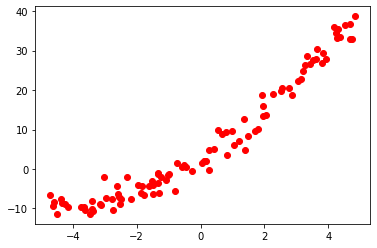

In [ ]:
plt.scatter(X, y, color='red')

A continuación procederemos a entrenar tres modelos, el primero de ellos será lineal, mientras que los otros dos serán **modelos polinomiales**, uno de grado 2 y el otro de un grado polinomial muchos más elevado.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_2_features = PolynomialFeatures(degree=2, include_bias=False)
poly_high_features = PolynomialFeatures(degree=50, include_bias=False)

# Agregamos caracteristicas a X para ser entrenado
X_2 = poly_2_features.fit_transform(X)
X_high = poly_high_features.fit_transform(X)

Para entrenar utilizaremos el modelo de regresión lineal de **Scikit Learn**, una vez entrenado realizaremos predicciones y observaremos el resultado en una gráfica.

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
degree_2_model = LinearRegression()
high_degree_model = LinearRegression()

linear_model.fit(X, y)
degree_2_model.fit(X_2, y)
high_degree_model.fit(X_high, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_predict = np.linspace(-length/2, length/2, 2*size).reshape(-1,1)
y_predict = linear_model.predict(x_predict)
y_2_predict = degree_2_model.predict(
    poly_2_features.transform(x_predict))
y_high_predict = high_degree_model.predict(
    poly_high_features.transform(x_predict))

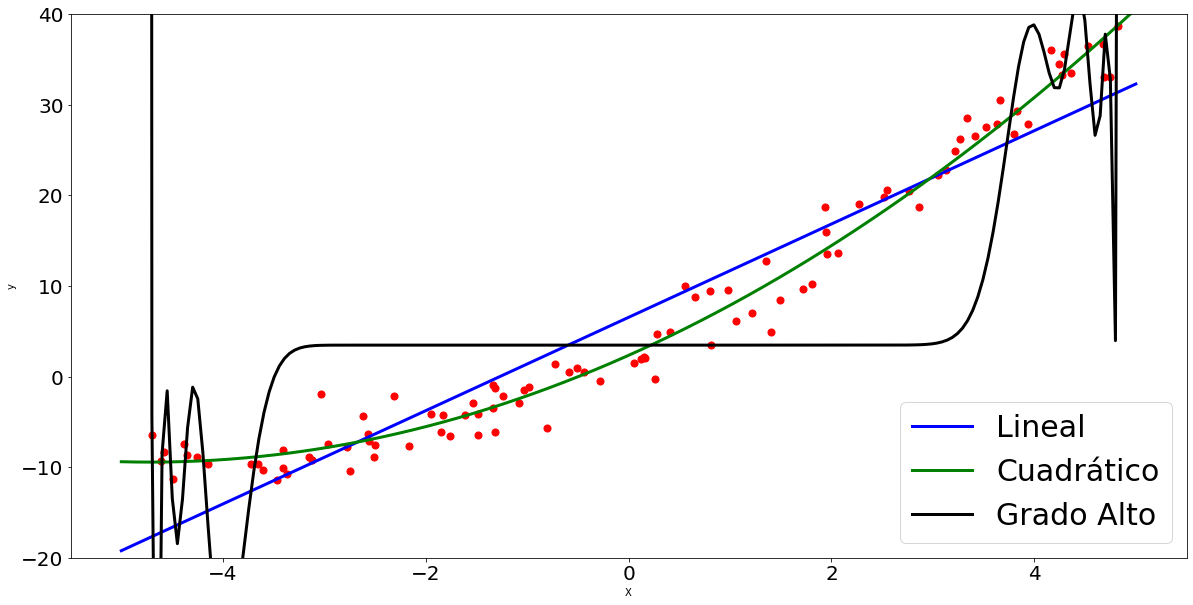

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, color='red', s=50)
plt.plot(x_predict, y_predict, color='blue', label="Lineal", linewidth=3)
plt.plot(x_predict, y_2_predict, color='green', label='Cuadrático', linewidth=3)
plt.plot(x_predict, y_high_predict, color='black', label='Grado Alto', linewidth=3)
plt.ylim(-20, 40)
plt.xlabel("X")
plt.ylabel("y")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})

Cual de las tres curvas se ajusta mejor a los datos? Como hemos generado los datos nosotros mismos, es evidente que el modelo cuadrático será el mejor, mientras que los otros dos sufriran problemas al momento de predecir. En la práctica uno no siempre conoce el origen de los datos y es dificil identificar cual es el modelo adecuado a utilizar. De ahora en adelante nos basaremos en el gráfico anterior para continuar con los temas de relevancia.

## Overfitting

Que un modelo sufra de **overfitting** significa que el modelo es capaz de funcionar con bastante precisión en el conjunto de datos de entrenamiento, pero cuando se intenta generalizar dicho modelo, le resulta dificil ser preciso y generalmente el error de predicción es muy alto para nuevas instancias a predecir, esto se debe principalmente cuando un modelo es **muy complejo** y termina ajustandose de manera exagerada a los datos. Como podemos ver en la imagen, la curva de color, al ser una curva de mayor grado, intenta ajustarse de una manera más complicada a los datos, minimizando el error, pero como veremos más adelante, el error de generalización será mucho mayor.

Para solucionar el problema de overfitting, generalmente se puede hacer 3 cosas.
- Aumentar el conjunto de datos de entrenamiento.
- Reducir la complejidad del modelo.
- Regularizar el modelo.

Regularización es un tema que se verá al final de este estudio.

## Underfitting
Que un modelo sufra de underfitting significa que el modelo **no es capaz de predecir correctamente nuevas instancias**, tanto en el conjunto de datos de entrenamiento, como el conjunto de prueba o validación. Esto se debe simplemente a que el modelo no es lo suficientemente poderoso como para describir el problema de manera ideal, por lo que realizará lo mejor que pueda para minimizar el error, pero llegará un momento en que el rendimiento no se puede mejorar más y por ende, el modelo quedará saturado. En la imagen podemos observar que un modelo lineal no podrá generalizar perfectamente al conjunto de datos cuadrático, debido a que el modelo es incapaz de captar la naturaleza del conjunto de datos.

Para solucionar el problema de underfitting, generalmente se puede hacer 3 cosas.
- Aumentar el numero de parámetros del modelo.
- Aumentar la complejidad del modelo.
- Desregularizar el modelo.

## Como detectar Overfitting y Underfitting

El indicador más importante a la hora de detectar condiciones de **overfitting** y **underfitting** es el rendimiento del modelo, en el caso de problemas de regresión, errores tales como **RMSE** o **MSE** resultan ser de utilidad para detectar dichas condiciones, en el caso de problemas de clasificación, la **presición**, **F1**, u otras métricas similares son de utilidad para detectar, dependiendo de la naturaleza del problema. Como regla general, cuando un modelo se dempeña muy bien en el conjunto de entrenamiento, pero **falla** al momento de generalizar, nos encontramos ante un problema de **overfitting**, por el contrario, cuando el modelo tiene un mal desempeño tanto en el conjunto de entrenamiento, como el de validación, estamos frente a un problema de **underfitting**.

## Curvas de aprendizaje
Existe otra herramienta visual que es de mucha utilidad para identificar el comportamiento de un modelo y se llama **curva de aprendizaje**. Consiste en gráficar el rendimiento del modelo **en función del tamaño del dataset**. De está forma podemos observar como evoluciona el modelo a medida que crece el conjunto de entrenamiento. Observando la forma de dicha curva, podemos determinar a que tipo de problema nos estamos enfrentando. A continuación se implementará una rutina para graficar dichas curvas para nuestro modelo de regresión lineal.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y, xlim=None, ylim=None):
  X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []

  for size in range(1, len(X_train)):
    model.fit(X_train[:size], y_train[:size])
    y_train_prediction = model.predict(X_train[:size])
    y_val_prediction = model.predict(X_val)

    train_errors.append(
        mean_squared_error(y_train[:size], y_train_prediction)
    )
    val_errors.append(
        mean_squared_error(y_val, y_val_prediction)
    )
  train_sizes = [i for i in range(1, len(X_train))]
  plt.figure(figsize=(20,10))
  plt.plot(train_sizes, train_errors, "r-+", linewidth=4, label='Entrenamiento')
  plt.plot(train_sizes, val_errors, "b-", linewidth=4, label="Validación")
  plt.xlabel("Tamaño Dataset Entrenamiento")
  plt.ylabel("MSE")
  plt.legend(prop={'size': 30})
  if xlim is not None:
    plt.xlim(xlim)
  if ylim is not None:
    plt.ylim(ylim)

### Curva de aprendizaje modelo lineal
A continuación graficaremos la curva de aprendizaje de el modelo de regresión lineal de grado 1. Nótese que dicho modelo sufre de **underfitting**. Podemos observar como a medida que aumenta el numero de datos de entrenamiento, ambas curvas se acercan entre sí, pero quedan atascadas en un valor fijo de error, esto es característico de un modelo que sufre de underfit.

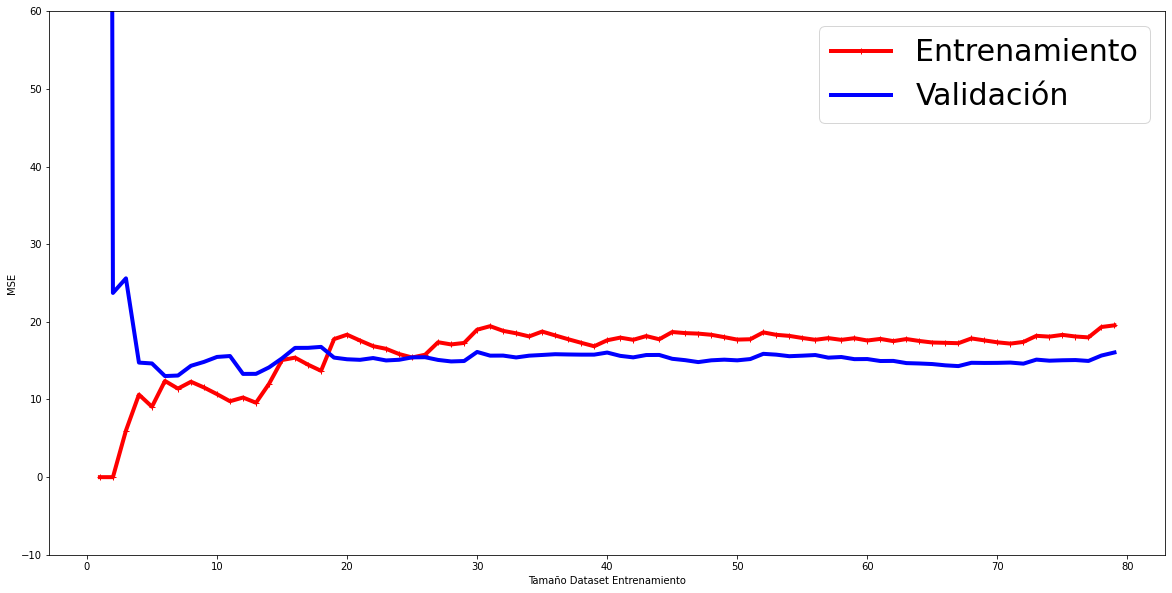

In [ ]:
plot_learning_curves(linear_model, X, y, ylim=(-10, 60))

### Curva de aprendizaje modelo cuadrático
Podemos observar que el error es mucho más bajo y ambas curvas tienden a estar más cercanas entre sí, podemos observar también que a medida que aumenta el numero de datos, el error también disminuye. Dicha curva es característica de un modelo adecuado al problema.

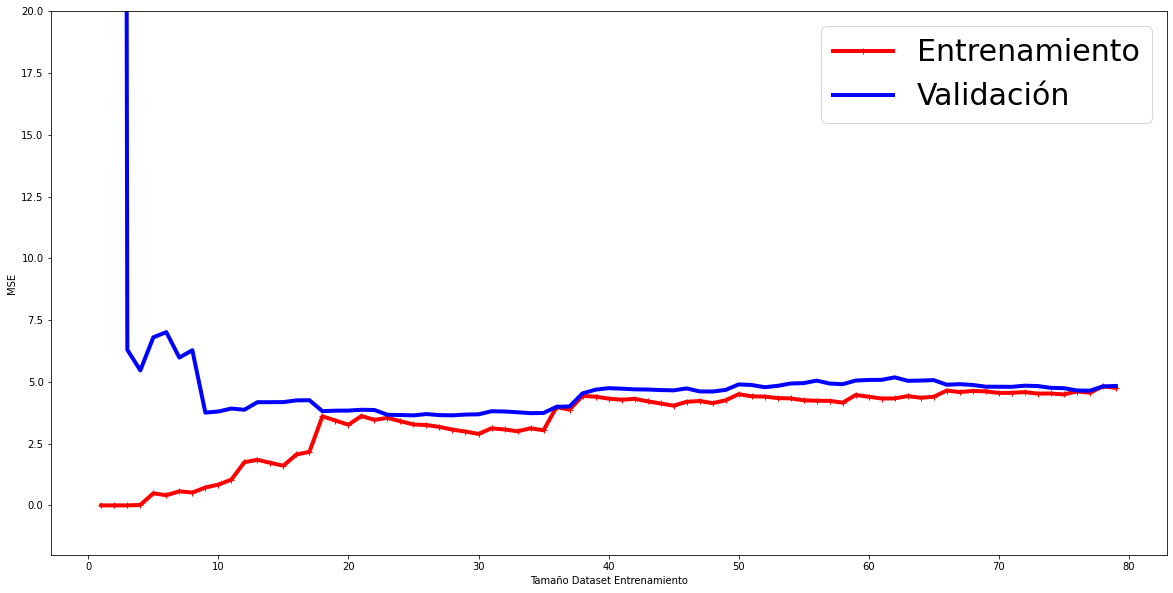

In [ ]:
plot_learning_curves(degree_2_model, X_2, y, ylim=(-2, 20))

### Curva de aprendizaje modelo de alto grado
Podemos observar que el error es de validación es mucho más grande que el error de entrenamiento. También se debiese esperar que a medida que aumenta el numero de datos de entrenamiento, el modelo mejora su desempeño acercandose, se puede observar que la curva de validación se acerca prograsivamente a la de entrenamiento, pero el margen de error entre ambas es muy alta. Esta es una curva típica de modelo que produce overfit.

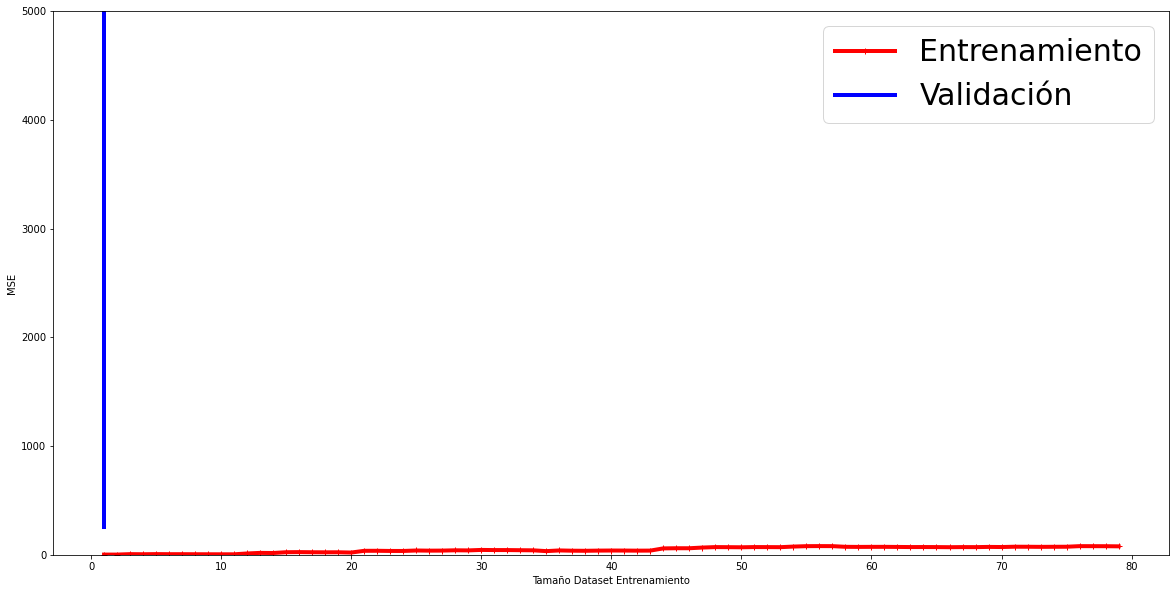

In [ ]:
plot_learning_curves(high_degree_model, X_high, y, ylim=(-2, 5000))

## Regularización
Vimos anteriormente que una de las formas de evitar **overfitting** y **underfitting** era regularizando y desregularizando respectivamente, pero, ¿Que es regularizar un modelo? Regularizar consiste en **restringir** el modelo en cierto aspecto, en otras palabras consisten en quitar al modelo grados de libertad, de esta forma el modelo se simplifica, lo cual como vimos que en el caso de overfit ayuda a mejorar su desempeño. A continuación se mostrará las técnicas más comunes de regularización aplicados a nuestro modelo de regresión lineal.

### Ridge Regression
La forma más sencilla de regularizar un modelo, es agregar una penalización a la función de coste, en el caso de **Ridge Regression**, se agrega la norma $\boldsymbol{l1}$, por lo que la función de coste se vería de la siguiente forma:
$$ J(\boldsymbol{\theta}) = \boldsymbol{MSE}(\boldsymbol{\theta})+ \frac{\alpha}{2}\boldsymbol{\theta}^T\boldsymbol{\theta}$$

Donde
$$\boldsymbol{MSE}(\boldsymbol{\theta}) = \frac{1}{2}\sum_{i}\left(\boldsymbol{\theta}^T\boldsymbol{x}^{(i)} - y^{(i)}\right)^2 $$

$\alpha$ es un **híperparámetro** que determina el grado de restricción. Si es 0, el modelo se convierte en un modelo de regresión lineal normal, si es muy grande, todos los parámetros tienden a 0. A continuación se muestra una comparativa entre modelos regularizados y no regularizados con *Ridge Regression*.
> IMPORTANTE: Siempre que se utiliza regularización, se debe escalar los parámetros, debido a que la regularización es muy sensible a la magnitud de dichos parámetros.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [18]:
pipe = Pipeline([
                 ("scaler", StandardScaler()),
                 ("ridge", Ridge(solver="cholesky"))
])
a, b = 2, 3
y_linear = a*X + b + np.random.normal(0, 4, size=(size, 1))

In [26]:
y_ridge_predictions = []
alphas = [0, 10, 100]
for alpha in alphas:
  pipe.set_params(ridge__alpha=alpha)
  pipe.fit(X, y_linear)
  y_ridge_predictions.append(
      pipe.predict(x_predict)
  )

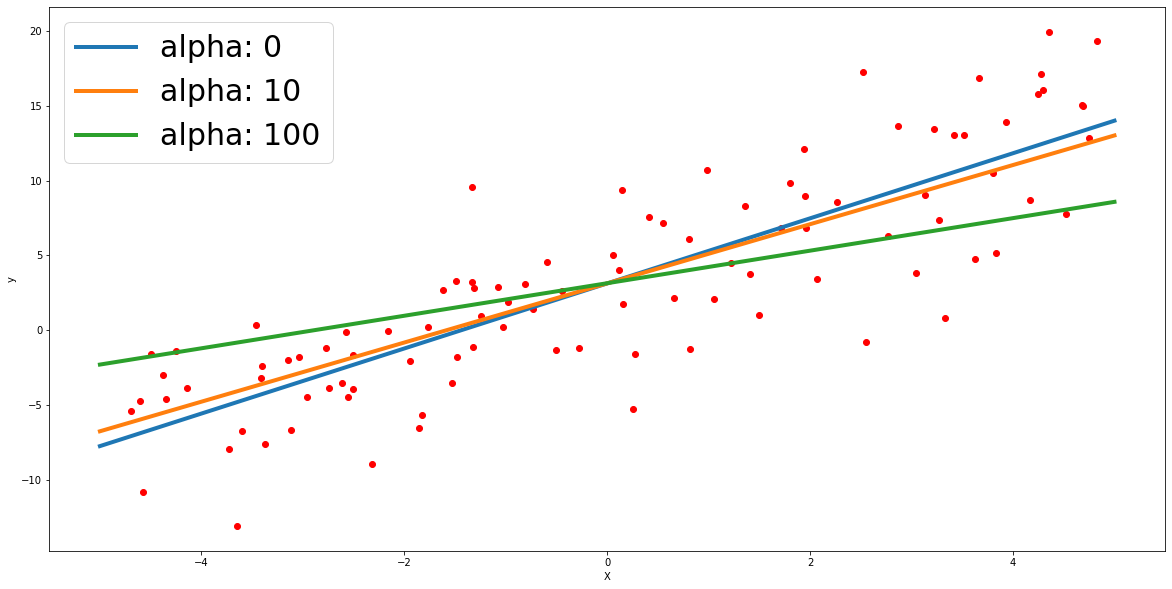

In [27]:
plt.figure(figsize=(20,10))
plt.scatter(X, y_linear, color="red")
i = 0
for r_prediction in y_ridge_predictions:
  plt.plot(x_predict, r_prediction, linewidth=4, label=f'alpha: {alphas[i]}')
  i += 1
plt.xlabel("X")
plt.ylabel("y")
plt.legend(prop={'size': 30})
plt.show()

### Lasso Regression
La regresión **Lasso** funciona bajo los mismos principios que **Ridge**, con la única diferencia es que como penalización utiliza la norma $\boldsymbol{l1}$, el cual se compone de la siguiente forma:

$$ J(\boldsymbol{\theta}) = \boldsymbol{MSE}(\boldsymbol{\theta}) + \alpha \sum_{i}\lvert\theta_i\rvert $$

Scikit Learn implementa dicho modelo con la clase `Lasso`, que se encuentra en `sklearn.linear_models`.

### Elastic Net
Finalmente, tenemos que **Elastic Net** corresponde a una mezcla entre ambos métodos de regularización, agregando un hiperparámetro llamdo $r$, el cual determina el grado de relevancia de cada penalización. Un $r$ pequeño significa que predomina la penalización $\boldsymbol{l2}$, en cambio, con un $r$ grande predomina la penalización $\boldsymbol{l1}$.

$$ J(\boldsymbol{\theta}) = \boldsymbol{MSE}(\boldsymbol{\theta}) + \frac{1-r}{2}\alpha\boldsymbol{\theta}^T\boldsymbol{\theta} + r\alpha \sum_{i}\lvert\theta_i\rvert $$

Dicho modelo es implementado en Scikit Learn mediante la clase `ElasticNet`, dentro de la libreria `sklearn.linear_models`.

### Early Stopping
Como ultimo método de regularización a mencionar, tenemos **Early Stopping**, el cual es un método sencillo, pero poderoso. Consiste en utilizar un algoritmo de entrenamiento iterativo como por ejemplo el **descenso del gradiente**. La idea detras de *Early Stopping* es entrenar iterativamente hasta que se alcanza un **mínimo** en el desempeño del conjunto de datos de validación. Es un método efectivo ya que minimiza el **overfitting**, debido a que se deja de realizar el entrenamiento una vez que el rendimiento en los datos de validación empiezan a subir.